In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import statistics
import scipy.stats as stats
from datetime import datetime

In [49]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [50]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

C:\Users\Bhuli\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
df = pd.read_csv('C:\\Users\\Bhuli\\Desktop\\Fire-Incidents.csv')
pd.set_option('display.max_columns', None)  
df.head(500)

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Roof,Undetermined,0,0,50000,0,2018-04-22T05:43:45,Confined to roof/exterior structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2018-04-22T05:44:00,Other Electrical Distribution Item,412,1.0,2018-04-22T08:31:51,43.753037,-79.619530,Other,Extinguished by fire department,Electrical Failure,Other Mercantile,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Fire with smoke sh

In [86]:
df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


In [38]:
df = pd.read_csv('C:\\Users\\Bhuli\\Desktop\\Fire-Incidents.csv')
pd.set_option('display.max_columns', None)  
df.head(500)

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Roof,Undetermined,0,0,50000,0,2018-04-22T05:43:45,Confined to roof/exterior structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2018-04-22T05:44:00,Other Electrical Distribution Item,412,1.0,2018-04-22T08:31:51,43.753037,-79.619530,Other,Extinguished by fire department,Electrical Failure,Other Mercantile,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Fire with smoke sh

In [41]:
#Check column list present in df
df.columns

Index(['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties',
       'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area',
       'Incident_Ward', 'Last_TFS_Unit_Clear_Time', 'Latitude', 'Longitude',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival',
       'TFS_Alarm_Time', 'TFS_Arrival_Time'],
      dtype='object')

In [42]:
#check descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [43]:
#check the number of rows and columns present in df
print('rows---->',df.shape[0])
print('columns---->',df.shape[1])

rows----> 11214
columns----> 27


In [44]:
#Lets see null value count in df
df.isnull().sum()

Area_of_Origin                               0
Business_Impact                              0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Dollar_Loss                        0
Estimated_Number_Of_Persons_Displaced        0
Ext_agent_app_or_defer_time                  0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use 

In [45]:
df.isnull().mean()*100  #check the percentage of null value

Area_of_Origin                              0.000000
Business_Impact                             0.000000
Civilian_Casualties                         0.000000
Count_of_Persons_Rescued                    0.000000
Estimated_Dollar_Loss                       0.000000
Estimated_Number_Of_Persons_Displaced       0.000000
Ext_agent_app_or_defer_time                 0.000000
Extent_Of_Fire                              0.000000
Fire_Alarm_System_Impact_on_Evacuation      0.000000
Fire_Alarm_System_Operation                 0.000000
Fire_Alarm_System_Presence                  0.000000
Fire_Under_Control_Time                     0.000000
Ignition_Source                             0.000000
Incident_Station_Area                       0.000000
Incident_Ward                               0.294275
Last_TFS_Unit_Clear_Time                    0.000000
Latitude                                    0.000000
Longitude                                   0.000000
Material_First_Ignited                      0.

In [46]:
df.isnull().mean()*100  #check the percentage of null value

Area_of_Origin                              0.000000
Business_Impact                             0.000000
Civilian_Casualties                         0.000000
Count_of_Persons_Rescued                    0.000000
Estimated_Dollar_Loss                       0.000000
Estimated_Number_Of_Persons_Displaced       0.000000
Ext_agent_app_or_defer_time                 0.000000
Extent_Of_Fire                              0.000000
Fire_Alarm_System_Impact_on_Evacuation      0.000000
Fire_Alarm_System_Operation                 0.000000
Fire_Alarm_System_Presence                  0.000000
Fire_Under_Control_Time                     0.000000
Ignition_Source                             0.000000
Incident_Station_Area                       0.000000
Incident_Ward                               0.294275
Last_TFS_Unit_Clear_Time                    0.000000
Latitude                                    0.000000
Longitude                                   0.000000
Material_First_Ignited                      0.

In [47]:
#Rename columns names for easy to understand, we can also use df.rename
df.column=['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties','Count_of_Persons_Rescued', 'Estimated_Dollar_Loss']

C:\Users\Bhuli\AppData\Local\Temp\ipykernel_12152\3700054506.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.column=['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties','Count_of_Persons_Rescued', 'Estimated_Dollar_Loss']


In [48]:
In [17]: sa = pd.Series([1, 2, 3], index=list('abc'))

In [18]: dfa = df.copy()

In [50]:
sa.b


2

In [51]:
dfa.Longitude

0       -79.412479
1       -79.530419
2       -79.373460
3       -79.393700
4       -79.511539
           ...    
11209   -79.373778
11210   -79.280725
11211   -79.280725
11212   -79.500863
11213   -79.589233
Name: Longitude, Length: 11214, dtype: float64

In [52]:
dfa.A = list(range(len(dfa.index)))  # ok if A already exists

C:\Users\Bhuli\AppData\Local\Temp\ipykernel_12152\2863675631.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfa.A = list(range(len(dfa.index)))  # ok if A already exists


In [53]:
# Split the dataset into features (X) and target (y)
X = df['Longitude']
y = df['Latitude']

In [57]:
#Devide x and y parameters to train model
x=df.Longitude
x

0       -79.412479
1       -79.530419
2       -79.373460
3       -79.393700
4       -79.511539
           ...    
11209   -79.373778
11210   -79.280725
11211   -79.280725
11212   -79.500863
11213   -79.589233
Name: Longitude, Length: 11214, dtype: float64

In [54]:
explore_dict = {
    'Mean' : [df.Civilian_Casualties.mean(), df.Count_of_Persons_Rescued.mean(), 
                df.Estimated_Dollar_Loss.mean(), df.Estimated_Number_Of_Persons_Displaced.mean(), 
                df.Incident_Station_Area.mean(), df.Incident_Ward.mean()],
    
    'Median' : [statistics.median(df.Civilian_Casualties), statistics.median(df.Count_of_Persons_Rescued),
                statistics.median(df.Estimated_Dollar_Loss), statistics.median(df.Estimated_Number_Of_Persons_Displaced),
                statistics.median(df.Incident_Station_Area), statistics.median(df.Incident_Ward)],
    
    'Min Value' : [df.Civilian_Casualties.min(), df.Count_of_Persons_Rescued.min(), 
                   df.Estimated_Dollar_Loss.min(), df.Estimated_Number_Of_Persons_Displaced.min(), 
                   df.Incident_Station_Area.min(), df.Incident_Ward.min()],
    
    'Max Value' : [df.Civilian_Casualties.max(), df.Count_of_Persons_Rescued.max(), 
                   df.Estimated_Dollar_Loss.max(), df.Estimated_Number_Of_Persons_Displaced.max(), 
                   df.Incident_Station_Area.max(), df.Incident_Ward.max()],
    
    'Most Common' : [df.Civilian_Casualties.value_counts().idxmax(), df.Count_of_Persons_Rescued.value_counts().idxmax(), 
                           df.Estimated_Dollar_Loss.value_counts().idxmax(), df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmax(), 
                           df.Incident_Station_Area.value_counts().idxmax(), df.Incident_Ward.value_counts().idxmax()],
    
    'Least Common' : [df.Civilian_Casualties.value_counts().idxmin(), df.Count_of_Persons_Rescued.value_counts().idxmin(), 
                            df.Estimated_Dollar_Loss.value_counts().idxmin(), df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmin(), 
                            df.Incident_Station_Area.value_counts().idxmin(), df.Incident_Ward.value_counts().idxmin()],
    
    'Variance' : [statistics.variance(df.Civilian_Casualties), statistics.variance(df.Count_of_Persons_Rescued),
                statistics.variance(df.Estimated_Dollar_Loss), statistics.variance(df.Estimated_Number_Of_Persons_Displaced),
                statistics.variance(df.Incident_Station_Area), statistics.variance(df.Incident_Ward)],
    
    
    'Skew' : [df.Civilian_Casualties.skew(), df.Count_of_Persons_Rescued.skew(), 
              df.Estimated_Dollar_Loss.skew(), df.Estimated_Number_Of_Persons_Displaced.skew(), 
              df.Incident_Station_Area.skew(), df.Incident_Ward.skew()],
    
    'Kurtosis' : [df.Civilian_Casualties.kurt(), df.Count_of_Persons_Rescued.kurt(), 
                  df.Estimated_Dollar_Loss.kurt(), df.Estimated_Number_Of_Persons_Displaced.kurt(), 
                  df.Incident_Station_Area.kurt(), df.Incident_Ward.kurt()],
    
    'Mean Absolute Deviation' : [df.Civilian_Casualties.mad(), df.Count_of_Persons_Rescued.mad(), 
                                 df.Estimated_Dollar_Loss.mad(), df.Estimated_Number_Of_Persons_Displaced.mad(), 
                                 df.Incident_Station_Area.mad(), df.Incident_Ward.mad()],
}

explore_df = pd.DataFrame(explore_dict, index = ['Civilian Casualties', 'Count of persons rescued',
                                                 'Estimated Dollar Loss', 'Estimated Number of Persons Displaced',
                                                 'Incident Station Area', 'Incident Ward'])
explore_df.head(500)

C:\Users\Bhuli\AppData\Local\Temp\ipykernel_25480\2395980714.py:39: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  'Mean Absolute Deviation' : [df.Civilian_Casualties.mad(), df.Count_of_Persons_Rescued.mad(),
C:\Users\Bhuli\AppData\Local\Temp\ipykernel_25480\2395980714.py:40: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.Estimated_Dollar_Loss.mad(), df.Estimated_Number_Of_Persons_Displaced.mad(),
C:\Users\Bhuli\AppData\Local\Temp\ipykernel_25480\2395980714.py:41: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.Incident_Station_Area.mad(), df.Incident_Ward.mad()],


,Mean,Median,Min Value,Max Value,Most Common,Least Common,Variance,Skew,Kurtosis,Mean Absolute Deviation
Civilian Casualties,0.112538,0.0,0.0,15.0,0.0,15.0,2.083276e-01,8.455166,149.308247,0.205988
Count of persons rescued,0.062154,0.0,0.0,86.0,0.0,86.0,9.265744e-01,67.355363,5747.892245,0.120684
Estimated Dollar Loss,42943.693419,2500.0,0.0,50000000.0,0.0,15600.0,2.850884e+11,76.107737,6892.877165,63425.666540
Estimated Number of Persons Displaced,17.274835,0.0,0.0,999.0,0.0,230.0,1.417807e+04,7.929017,61.853362,31.293370
Incident Station Area,288.281880,314.0,111.0,445.0,426.0,346.0,1.155969e+04,-0.154630,-1.215131,94.124758
Incident Ward,19.582685,27.0,1.0,44.0,20.0,39.0,NaN,0.297472,-0.930809,9.927881


In [67]:
pip install opencv-python opencv-contrib-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 2.0 MB/s eta 0:00:19
   ---------------------------------------- 0.0/38.6 MB 2.0 MB/s eta 0:00:19
   ---------------------------------------- 0.0/38.6 MB 2.0 MB/s eta 0:00:19
   ---------------------------------------- 0.2/38.6 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.2/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:35
   -------

In [27]:
import os
import numpy
print (numpy.__path__) # checking the venv is loaded
from matplotlib import pyplot as plt
import cv2

['C:\\Users\\Bhuli\\anaconda3\\Lib\\site-packages\\numpy']


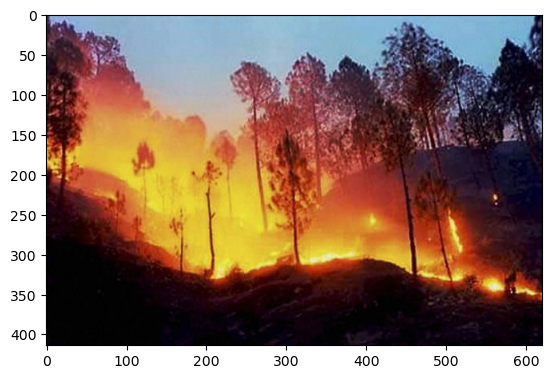

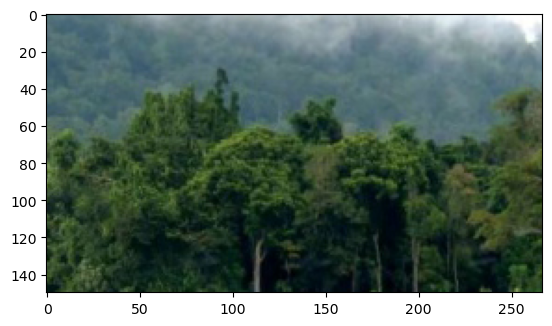

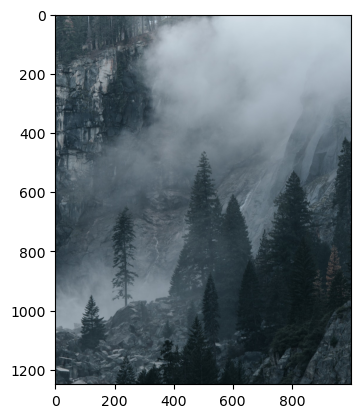

In [70]:
# taking a look at the images and checking their size

fire_image_path = "df//fire/00000090.jpg"
no_fire_image_path = "df//no_fire/00000185.jpg"
start_fire_image_path = "df//start_fire/00000094.jpg"

fire_image = cv2.imread(fire_image_path)
fire_image = cv2.cvtColor(fire_image, cv2.COLOR_BGR2RGB)

plt.imshow(fire_image)
plt.show()

no_fire_image = cv2.imread(no_fire_image_path)
no_fire_image = cv2.cvtColor(no_fire_image, cv2.COLOR_BGR2RGB)

plt.imshow(no_fire_image)
plt.show()

start_fire_image = cv2.imread(start_fire_image_path)
start_fire_image = cv2.cvtColor(start_fire_image, cv2.COLOR_BGR2RGB)

plt.imshow(start_fire_image)
plt.show()

In [ ]:
# from our analysis, all the images are different sizes and may contain people or animals
# however these are overwhelmingly pictures taken in woods
# a very important thing is that start_fire seems to contain pictures of smoky or misty environments which may not be fire

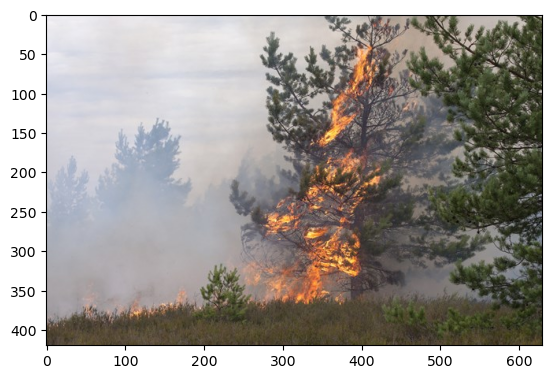

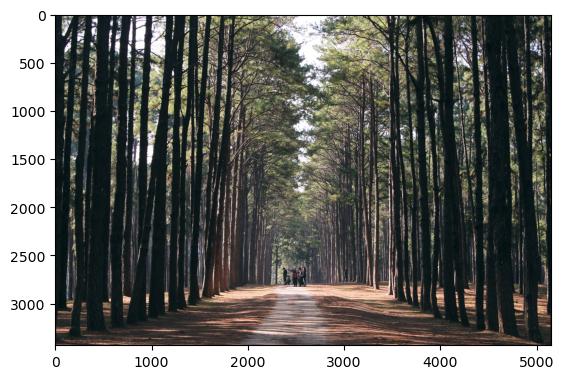

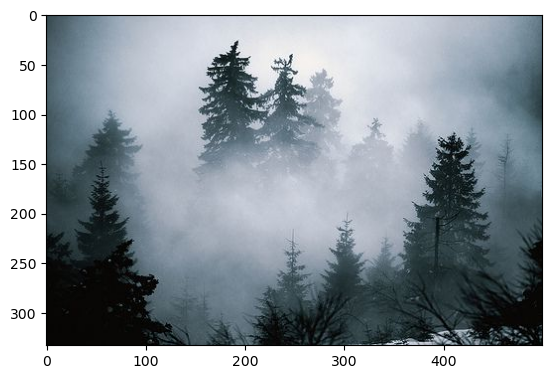

In [11]:
# taking a look at the images and checking their size

fire_image_path = "df/medium/fire/yosemite (13).png"
no_fire_image_path = "df/medium/no_fire/tumblr_ohha8jH8dr1rs81xfo1_500.jpg"
start_fire_image_path = "df/medium/start_fire/SmokeDogHead (101).png"

fire_image = cv2.imread("C:\\Users\\Bhuli\\Desktop\\fire-detection\\datasets\\fire\\00000047.jpg")
fire_image = cv2.cvtColor(fire_image, cv2.COLOR_BGR2RGB)

plt.imshow(fire_image)
plt.show()

no_fire_image = cv2.imread("C:\\Users\\Bhuli\\Desktop\\fire-detection\\datasets\\no_fire\\00000015.jpg")
no_fire_image = cv2.cvtColor(no_fire_image, cv2.COLOR_BGR2RGB)

plt.imshow(no_fire_image)
plt.show()

start_fire_image = cv2.imread("C:\\Users\\Bhuli\\Desktop\\fire-detection\\datasets\\start_fire\\00000170.jpg")
start_fire_image = cv2.cvtColor(start_fire_image, cv2.COLOR_BGR2RGB)

plt.imshow(start_fire_image)
plt.show()

In [76]:
#Devide the whole dataset into training and testing set for model training
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(11214,)
(8971,)
(2243,)


In [77]:
xtrain,xtest


(6596   -79.480080
 7471   -79.262380
 9083   -79.276050
 4611   -79.313310
 6479   -79.538950
           ...    
 6400   -79.360180
 9160   -79.566200
 9859   -79.401060
 1688   -79.292072
 5994   -79.498160
 Name: Longitude, Length: 8971, dtype: float64,
 7887    -79.331410
 8287    -79.444180
 3524    -79.440960
 3798    -79.234170
 7527    -79.435970
            ...    
 11176   -79.595370
 7397    -79.458770
 10673   -79.409340
 1448    -79.463804
 4130    -79.313350
 Name: Longitude, Length: 2243, dtype: float64)

In [80]:
ytrain,ytest

(6596    43.727470
 7471    43.698630
 9083    43.785930
 4611    43.776500
 6479    43.758480
           ...    
 6400    43.715490
 9160    43.734230
 9859    43.709170
 1688    43.729973
 5994    43.619390
 Name: Latitude, Length: 8971, dtype: float64,
 7887     43.718360
 8287     43.639970
 3524     43.639740
 3798     43.753920
 7527     43.640720
            ...    
 11176    43.744290
 7397     43.668600
 10673    43.674260
 1448     43.663654
 4130     43.716990
 Name: Latitude, Length: 2243, dtype: float64)

In [81]:
ytrain=ytrain.astype('int')
ytest=ytest.astype('int')

In [85]:
print(xtrain)

6596   -79.480080
7471   -79.262380
9083   -79.276050
4611   -79.313310
6479   -79.538950
          ...    
6400   -79.360180
9160   -79.566200
9859   -79.401060
1688   -79.292072
5994   -79.498160
Name: Longitude, Length: 8971, dtype: float64


In [93]:
#the input data (x, regressor)
x = np.array(df["Area_of_Origin"]).reshape(-1,1)

In [94]:
x.shape

(11214, 1)

In [95]:
print(x)

[['Porch or Balcony']
 ['Cooking Area or Kitchen']
 ['Living Area (e.g. living, TV, recreation, etc)']
 ...
 ['Other Storage Area']
 ['Porch or Balcony']
 ['Trash, Rubbish Storage (inc garbage chute room, garbage/industri']]


In [96]:
#the input data (x, regressor)
y = np.array(df["Method_Of_Fire_Control"])

In [97]:
y.shape

(11214,)

In [98]:
print(y)

['Extinguished by fire department' 'Extinguished by occupant'
 'Extinguished by fire department' ... 'Extinguished by occupant'
 'Extinguished by fire department' 'Extinguished by fire department']


In [99]:
#splitting the dataset
#import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [100]:
#Eploring the train and testn datasets
x_train.shape

(7849, 1)

In [101]:
x_test.shape

(3365, 1)

In [102]:
y_train.shape

(7849,)

In [103]:
y_test.shape

(3365,)

In [112]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((7849,), (3365,))

C:\Users\Bhuli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


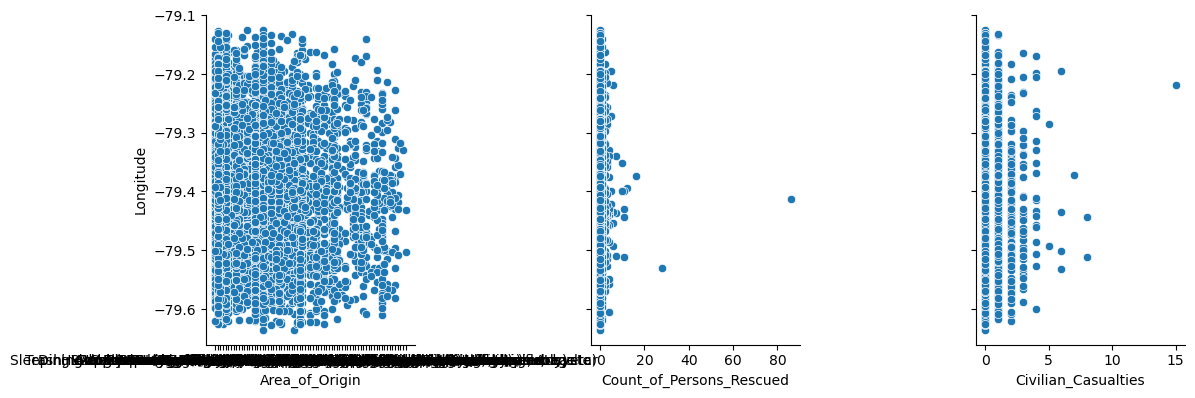

In [136]:
#Importing seaborn library for visualizations
import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(df, x_vars=[ 'Area_of_Origin', 'Count_of_Persons_Rescued', 'Civilian_Casualties' ], y_vars = 'Longitude', size =4 , kind = 'scatter' )
plt.show()

In [44]:

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:\\Users\\Bhuli\\Desktop\\forest_fire\\Testing",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:\\Users\\Bhuli\\Desktop\\forest_fire\\Testing",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 68 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [15]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7063 - loss: 0.9700 - val_accuracy: 0.8824 - val_loss: 0.4877
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8605 - loss: 0.5245 - val_accuracy: 0.7206 - val_loss: 0.4304
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7149 - loss: 0.3687 - val_accuracy: 0.8824 - val_loss: 0.4268
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 932ms/step - accuracy: 0.9090 - loss: 0.4321 - val_accuracy: 0.8971 - val_loss: 0.3560
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7962 - loss: 0.4137 - val_accuracy: 0.9265 - val_loss: 0.2853
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9208 - loss: 0.2264 - val_accuracy: 0.9118 - val_loss: 0.1834
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8725 - loss: 0.2461 - val_accuracy: 0.9559 - val_loss: 0.1263
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 880ms/step - accuracy: 0.9775 - loss: 0.1427 - val_accuracy: 0.9706 - val_loss: 0.0760
Epoch 9/10

In [16]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step


In [17]:
predictions


array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [19]:
print(len(predictions))


68


In [16]:
def predictImage(abc185):
    img1 = image.load_img("C:\\Users\\Bhuli\\Desktop\\forest_fire\\Testing\\nofire\\abc370.jpg",target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=15)
    elif val == 0:
        plt.xlabel("Fire",fontsize=15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.9999917]]


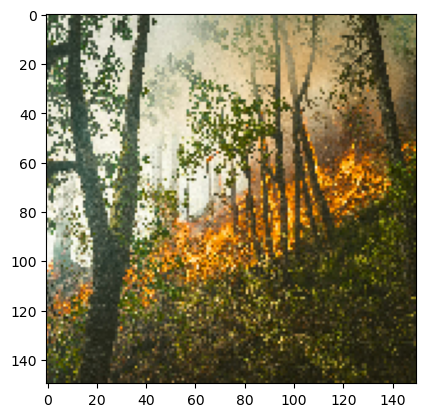

In [111]:
# Call the predictImage function with the image path
predictImage("C:\\Users\\Bhuli\\Downloads\\karsten-winegeart-XGGmhortdtA-unsplash.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[1.]]


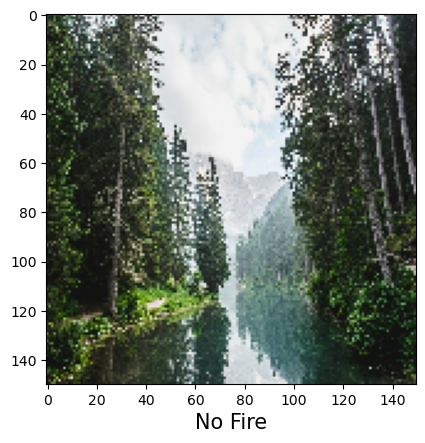

In [113]:
# Call the predictImage function with the image path
predictImage("C:\\Users\\Bhuli\\Downloads\\abhc152.jpg")